<a href="https://colab.research.google.com/github/AndrewWD1/tda/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Go to next cell, this cell is required just to import some packages
!pip install ripser
!pip install persim

import numpy as np
import csv
from ripser import ripser
from persim import plot_diagrams


In [ ]:
# Define some functions to read csv file into the correct format
def deepmap(fn, mylist):
  """
  Finds the deepest nested values that aren't lists in
  order to apply the mapping function to them
  """
  if (len(mylist) == 0):
    return mylist
  elif (type(mylist[0]) == list):
    return list(map(lambda x: deepmap(fn, x), mylist))
  else:
    return list(map(fn, mylist))


def stringCSVDataToFloats(data):
  """
  Takes a csv.reader object and returns a list
  where the values are no longer strings but instead
  floats
  """
  return deepmap(float, list(data))

def useableArray(data):
  """
  Takes our datasets, which get read as list of strings, 
  converts values to floats, then transposes so that data 
  is grouped properly
  """
  data = stringCSVDataToFloats(data)
  data = np.array(data)
  data = data.transpose()
  return data

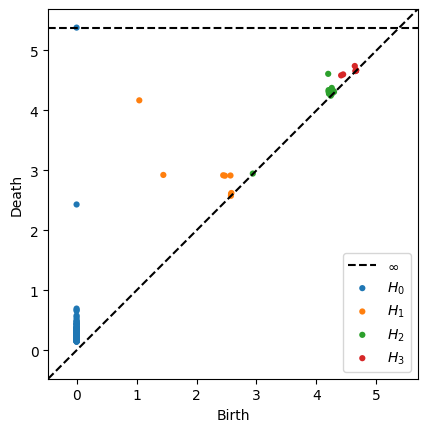

In [ ]:
with open('anthony_iso.csv', newline='') as csv_file:
  data = csv.reader(csv_file)
  data = useableArray(data)

  # Taking just the first 100 data points. Many more and the kernel seems to die 
  data = data[:100]
  diagrams = ripser(data, maxdim=3)['dgms']
  plot_diagrams(diagrams, show=True)


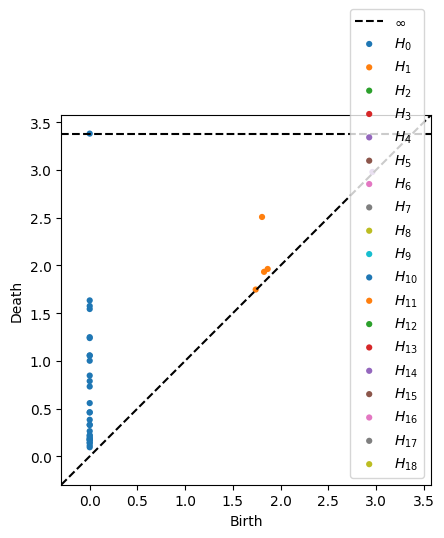

In [ ]:
with open('anthony_10503_X_24.csv', newline='') as csv_file:
  data = csv.reader(csv_file)
  data = useableArray(data)

  # Taking just the first 30 data points
  data = data[:30]
  diagrams = ripser(data, maxdim=18)['dgms']
  plot_diagrams(diagrams, show=True)